In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.pleiades.interface import VariationalAutoencoder
from src.pleiades.data_module import DataLoader
from tqdm.auto import tqdm

2024-08-04 18:17:21.057713: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 18:17:21.067422: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 18:17:21.070261: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 18:17:21.569171: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
vae = VariationalAutoencoder("/home/arezy/Desktop/ProjectPleiades/training_scripts/vae/outputs/"
                             "2024-08-03/22-07-34/results/vae_ckpt/", step=47000)


dataloader = DataLoader(
    data_dir='../../src/pleiades/exp_data/satel_array_202312bandopt00_clear.npy',
    batch_size=8, 
    auto_normalisation=True
)

data, _ = dataloader.get_train_test_dataset()

d = vae.encode(next(data))

loading vae from %s /home/arezy/Desktop/ProjectPleiades/training_scripts/vae/outputs/2024-08-03/22-07-34/results/vae_ckpt/


2024-08-04 18:17:22.378859: W external/xla/xla/service/gpu/nvptx_compiler.cc:765] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.5.82). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2024-08-04 18:17:24.193558: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.58GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-08-04 18:17:26.608388: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.40GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more mem

AttributeError: 'CompositeArgs' object has no attribute 'apply_fn'

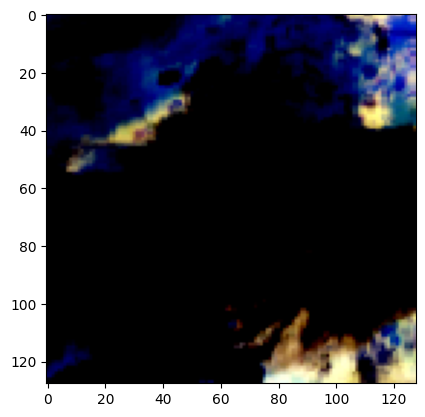

In [16]:
plt.imshow(next(data)[0, ..., :3])

In [19]:
d = vae.encode(next(data))
dd = vae.decode(d)
dd

Array([[[[nan, nan, nan, nan],
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         [nan, nan, nan, nan]],

        [[nan, nan, nan, nan],
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         [nan, nan, nan, nan]],

        [[nan, nan, nan, nan],
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         [nan, nan, nan, nan]],

        ...,

        [[nan, nan, nan, nan],
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         [nan, nan, nan, nan]],

        [[nan, nan, nan, nan],
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         ...,
         [nan, nan, nan, nan],
         [nan, nan, nan, nan],
         

In [9]:
dataloader = DataLoader(
    data_dir='../../src/pleiades/exp_data/satel_array_202312bandopt00_clear.npy', 
    batch_size=1
)

latent_data = np.array([])
pbar = tqdm(total=4000)
print('start')
i = 0
for image in dataloader.get_complete_dataset(batched=True, as_iterator=True):
    print(i)
    i += 1
    pbar.update(1)
    latent_data = np.append(latent_data, vae.encode(image))
    
np.save("latent_data.npy", latent_data)

  0%|          | 0/4000 [00:00<?, ?it/s]

start


I0000 00:00:1722762173.883021    6875 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-04 17:02:53.888963: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


0


2024-08-04 17:02:56.361910: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-08-04 17:02:57.349954: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-08-04 17:02:58.196059: W external/xla/xla/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 8.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [12]:
data = np.load("latent_data.npy")
print(data.shape)

(4487168,)


In [10]:
a = 10
if a:
    print(1)

1


In [24]:
dataloader = DataLoader(
    data_dir='../../src/pleiades/exp_data/satel_array_202312bandopt00_clear.npy', 
    batch_size=8
)

data = dataloader.get_complete_dataset(batched=True, as_iterator=True)

In [25]:
d = vae.encode(next(data))
print(np.array(d))

[[[[ 2.39347702e+02  2.05977633e+11 -5.92371083e+14 -5.09578167e+15]
   [ 1.10446564e+02 -9.32239353e+20 -9.74793015e+01  6.63987206e+28]
   [ 3.26707539e+04 -1.93927593e+01 -1.03499954e+02 -9.49749527e+01]
   ...
   [ 5.87276111e+15 -1.75022407e+20  1.04200290e+11 -6.94849750e+13]
   [ 4.21829643e+14 -1.47172359e+05  3.33380730e+16  1.06742500e+25]
   [-1.35158691e+01  5.36077309e+01 -5.73519063e+14  9.26604012e+20]]

  [[-9.00079547e+25             inf  1.40259498e+29  7.06572772e+23]
   [ 7.66723353e+23  1.61145867e+17  1.80696132e+30             inf]
   [ 7.01393262e-02  4.34329224e+01 -2.23470673e+02  4.33980978e+19]
   ...
   [ 4.94539659e+18  1.57827016e+05 -3.61313993e+12             inf]
   [ 5.97649353e+19  5.69718475e+01 -1.36441370e+22 -1.59899926e+36]
   [-1.04947090e+04 -2.89043975e+00  1.19604470e+11 -4.49239091e+09]]

  [[           -inf  2.80039472e+20 -2.91633469e+34             inf]
   [ 4.76633858e+11  3.94966401e+11  2.10573207e+20  6.58719302e+13]
   [ 8.72479630e

In [27]:
print(np.array(d).shape)

(8, 16, 16, 4)
